In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from math import floor, ceil, log10
import pandas as pd
import codecs

# https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
# https://stackoverflow.com/questions/23207055/rounding-errors-to-1-significant-figure-and-round-values-according-to-number-of
def round_to_n(data, n=1):
    if n != 1:
        return [round(x, -int(floor(log10(np.abs(x)))) + (n - 1)) for x in data]
    else:
        return [round(x, -int(floor(log10(np.abs(x))))) for x in data]

# returns data and error rounded to significance of error
def round_to_reference(data, ref, n):
    ref = round_to_n(ref, n)
    return ([round(x, -int(floor(log10(y))) + (n - 1)) for (x,y) in zip(data, ref)], ref)

rtn = round_to_n
rtr = round_to_reference

# Fit
def Kings_Law (x, const, m, B):
    y = const + m * (x-B)**4
    return y

# Returns flow velocity and uncertainty
def U_Düse_in_v(U):
    return (U*4.749, U*0.031)

label_size = 20
plt.rcParams.update({'font.size': label_size, 'legend.title_fontsize': 18, 'legend.fontsize': 18, "axes.labelsize": label_size, "xtick.labelsize": label_size, 
"ytick.labelsize": label_size, "axes.labelpad": 4, "lines.markersize": 10, "lines.linewidth": 2})


U=0.8: const, m, B
0.79 +/- 0.14, 3.6E+01 +/- 2.8, 0.573 +/- 0.016

U=1.0: const, m, B
0.93 +/- 0.14, 2.3E+01 +/- 2.0, 0.779 +/- 0.02

U=1.2: const, m, B
0.86 +/- 0.12, 1.0E+01 +/- 0.71, 0.898 +/- 0.02


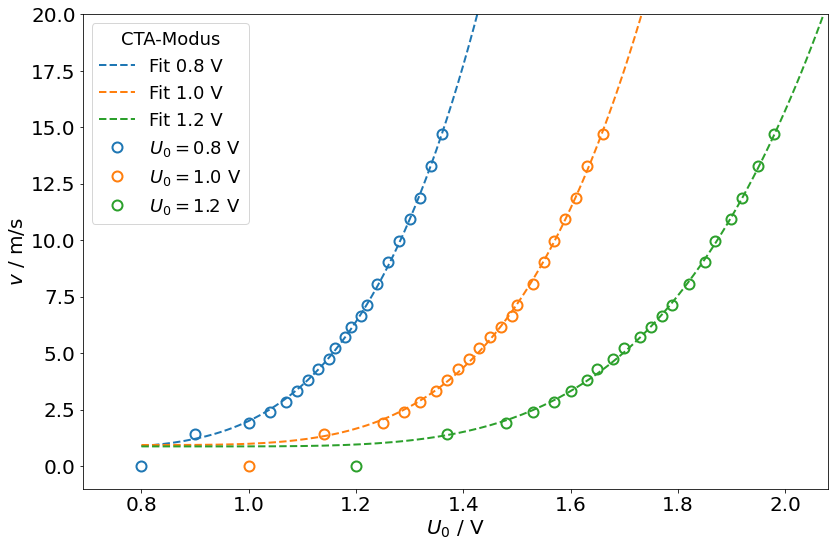

In [44]:
U = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
(v, delta_v) = U_Düse_in_v(U)
U_0_0_8 = np.array([0.8, 0.9, 1.0, 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.30, 1.32, 1.34, 1.36])
U_0_1_0 = np.array([1.0, 1.14, 1.25, 1.29, 1.32, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.50, 1.53, 1.55, 1.57, 1.59, 1.61, 1.63, 1.66])
U_0_1_2 = np.array([1.2, 1.37, 1.48, 1.53, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.77, 1.79, 1.82, 1.85, 1.87, 1.90, 1.92, 1.95, 1.98])

# U_0_0_8 = U_0_0_8-0.8
# U_0_1_0 = U_0_1_0-1
# U_0_1_2 = U_0_1_2-1.2
U_total = np.arange(U_0_0_8[0],3,0.01)


fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_0_0_8, U_0_1_0, U_0_1_2], [0.8, 1.0, 1.2])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V")
ax.set_ylim(bottom=-1, top=20)
ax.set_xlim(left=-0.05, right=U_0_1_2[-1]+0.1)
ax.legend(title="CTA-Modus")
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_3_CTA.png")

### CTA Verschoben


U=0.8: const, m, B
0.79 +/- 0.14, 3.6E+01 +/- 2.8, -0.227 +/- 0.016

U=1.0: const, m, B
0.93 +/- 0.14, 2.3E+01 +/- 2.0, -0.221 +/- 0.02

U=1.2: const, m, B
0.86 +/- 0.12, 1.0E+01 +/- 0.71, -0.302 +/- 0.02


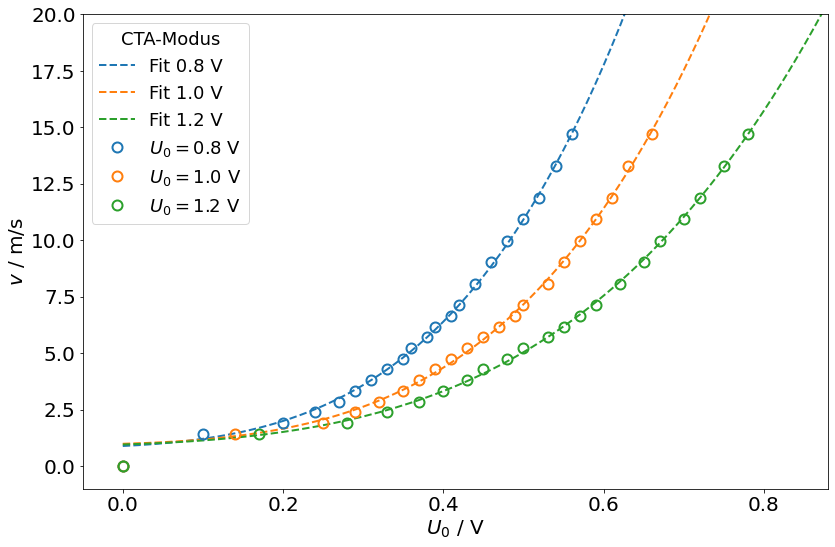

In [48]:
U = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
(v, delta_v) = U_Düse_in_v(U)
U_0_0_8 = np.array([0.8, 0.9, 1.0, 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.30, 1.32, 1.34, 1.36])
U_0_1_0 = np.array([1.0, 1.14, 1.25, 1.29, 1.32, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.50, 1.53, 1.55, 1.57, 1.59, 1.61, 1.63, 1.66])
U_0_1_2 = np.array([1.2, 1.37, 1.48, 1.53, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.77, 1.79, 1.82, 1.85, 1.87, 1.90, 1.92, 1.95, 1.98])

U_0_0_8 = U_0_0_8-0.8
U_0_1_0 = U_0_1_0-1
U_0_1_2 = U_0_1_2-1.2
U_total = np.arange(U_0_0_8[0],3,0.01)


fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_0_0_8, U_0_1_0, U_0_1_2], [0.8, 1.0, 1.2])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V")
ax.set_ylim(bottom=-1, top=20)
ax.set_xlim(left=-0.05, right=U_0_1_2[-1]+0.1)
ax.legend(title="CTA-Modus")
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_3_CTA_verschoben.png")

### Fit-Parameter Daten

In [27]:
U_0 = [0.8, 1.0, 1.2]
data_dict = {"$U_0 / \mathrm{V}$": U_0, "$\mathrm{const} / \\frac{m}{s}$": const_vec, "$\Delta \mathrm{const} / \\frac{m}{s}$": delta_const_vec,
             "$m / \\frac{m}{sV^4}$": m_vec,  "$\Delta m / \\frac{m}{sV^4}$": delta_m_vec,  "$B / \mathrm{V}$": B_vec, "$\Delta B / \mathrm{V}$": delta_B_vec,
}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
caption = r"Parameter und Fehler für den Fit in Abb. \ref{fig:Fahrrad_CTA} des Fahrradglühdrahtes mit Gl. (\ref{eq:Kings_Law}) im CTA Modus."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_Fit_Parameter", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA_Fit_Parameter.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_Fit_Parameter", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{???}
\label{tab:Fahrrad_CTA_Fit_Parameter}
\begin{tabular}{lllllll}
\toprule
$U_0 / \mathrm{V}$ & $\mathrm{const} / \frac{m}{s}$ & $\Delta \mathrm{const} / \frac{m}{s}$ & $m / \frac{m}{sV^4}$ & $\Delta m / \frac{m}{sV^4}$ & $B / \mathrm{V}$ & $\Delta B / \mathrm{V}$ \\
\midrule
               0.8 &                           0.79 &                                  0.14 &              3.6E+01 &                     2.8E+00 &           -0.227 &                   0.016 \\
                 1 &                           0.93 &                                  0.14 &              2.3E+01 &                     2.0E+00 &           -0.221 &                    0.02 \\
               1.2 &                           0.86 &                                  0.12 &              1.0E+01 &                     7.1E-01 &           -0.302 &                    0.02 \\
\bottomrule
\end{tabular}
\end{table}



### Messdaten

In [28]:
data_dict = {"$U / \mathrm{V}$": U, "$U_{0,0.8} / \mathrm{V}$": U_0_0_8, "$U_{0,1.0} / \mathrm{V}$": U_0_1_0, "$U_{0,1.2} / \mathrm{V}$": U_0_1_2}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
# caption = r"Messdaten zum im CTA-Modus betriebenen ISA Chrom 60 Heizdraht-Anemometer aus Kap. \ref{Kap:Heizdraht-Anemometer}. Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,8}=\SI{8}{V},U_{0,10}=\SI{10}{V}$ und $U_{0,12}=\SI{12}{V}$ bei der Düsenspannung $U$, um die Schaltung abzugleichen. Aufgrund der maximalen Spannungsversorgung können für einige Spannungen $U$ die Versorgespannungen $U_0$ nicht weiter erhöht werden."
caption = r"???"
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{???}
\label{tab:Fahrrad_CTA}
\begin{tabular}{rrrr}
\toprule
 $U / \mathrm{V}$ &  $U_{0,0.8} / \mathrm{V}$ &  $U_{0,1.0} / \mathrm{V}$ &  $U_{0,1.2} / \mathrm{V}$ \\
\midrule
              0.0 &                      0.00 &                      0.00 &                      0.00 \\
              0.3 &                      0.10 &                      0.14 &                      0.17 \\
              0.4 &                      0.20 &                      0.25 &                      0.28 \\
              0.5 &                      0.24 &                      0.29 &                      0.33 \\
              0.6 &                      0.27 &                      0.32 &                      0.37 \\
              0.7 &                      0.29 &                      0.35 &                      0.40 \\
              0.8 &                      0.31 &                      0.37 &                      0.43 \\
              0.9 &                      0.33 &          

### CCA Modus


U=0.8: const, m, B
1.72 +/- 0.13, 1.9E-02 +/- 0.002, -3.11 +/- 0.13


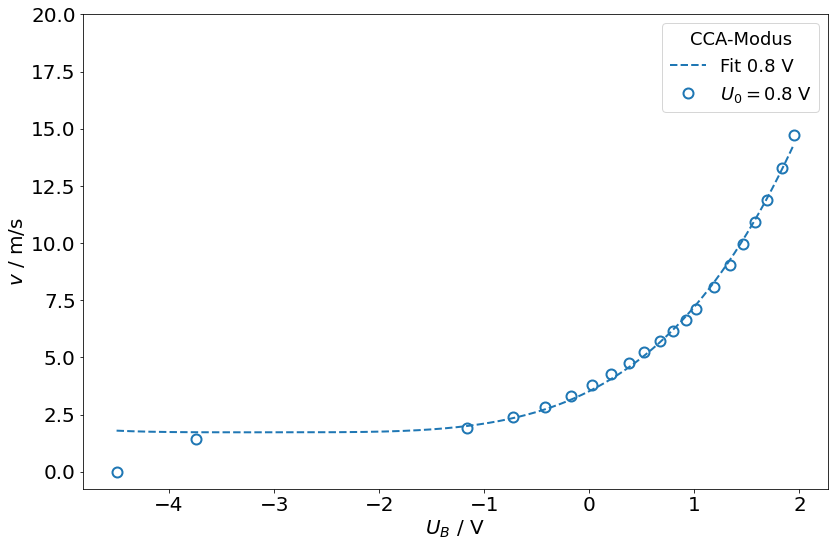

In [29]:
(v, delta_v) = U_Düse_in_v(U)
U_B = np.array([4.5, 3.74, 1.16, 0.73, 0.42, 0.17, -0.03, -0.21, -0.38, -0.52, -0.67, -0.80, -0.92, -1.02, -1.19, -1.34, -1.46, -1.58, -1.69, -1.83, -1.95])
U_B = U_B *-1
# U_total = np.arange(U_B[-1], U_B[0], 0.01)
U_total = np.arange(U_B[0], U_B[-1], 0.01)


fig, ax = plt.subplots(1,1, figsize=(12,8))

const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_B], [0.8])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [2, 0.1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)

label="Fit"
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_B$ / V")
ax.set_ylim(top=20)
ax.legend(title="CCA-Modus")
plt.tight_layout()
plt.savefig("Abb/Glühdraht_3_3_CCA_alleine.png")

### Alle Daten

In [30]:
data_dict = {"$U / \mathrm{V}$": U, "$U_{0,0.8} / \mathrm{V}$": U_0_0_8, "$U_{0,1.0} / \mathrm{V}$": U_0_1_0, "$U_{0,1.2} / \mathrm{V}$": U_0_1_2, "$U_B / \mathrm{V}$": U_B}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
caption = r"Messdaten für den Fahrradglühdraht aus Kap. \ref{Kap:Fahrradglühdraht}. Links: CTA Modus, Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,0.8}=\SI{0.8}{V},U_{0,1.0}=\SI{1.0}{V}$ und $U_{0,1.2}=\SI{1.2}{V}$ bei der Düsenspannung $U$, um die Schaltung abzugleichen. Rechts: CCA Modus, Messung der verstärkten Brückenspannung $U_B$ bei konstanter Versorgespannung $U_0=\SI{0.8}{V}$."
# caption = r"Messdaten für den ISA Chrom 60 Heizdraht aus Kap. \ref{Kap:Heizdraht-Anemometer}. Links: CTA Modus, Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,8}=\SI{8}{V},U_{0,10}=\SI{10}{V}$ und $U_{0,12}=\SI{12}{V}$ bei der Düsenspannung $U$, um die Schaltung abzugleichen. Rechts: CCA Modus, Messung der verstärkten Brückenspannung $U_B$ bei konstanter Versorgespannung $U_0=\SI{12}{V}$."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA_CCA.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{}
\label{tab:Fahrrad_CTA_CCA}
\begin{tabular}{rrrrr}
\toprule
 $U / \mathrm{V}$ &  $U_{0,0.8} / \mathrm{V}$ &  $U_{0,1.0} / \mathrm{V}$ &  $U_{0,1.2} / \mathrm{V}$ &  $U_B / \mathrm{V}$ \\
\midrule
              0.0 &                      0.00 &                      0.00 &                      0.00 &               -4.50 \\
              0.3 &                      0.10 &                      0.14 &                      0.17 &               -3.74 \\
              0.4 &                      0.20 &                      0.25 &                      0.28 &               -1.16 \\
              0.5 &                      0.24 &                      0.29 &                      0.33 &               -0.73 \\
              0.6 &                      0.27 &                      0.32 &                      0.37 &               -0.42 \\
              0.7 &                      0.29 &                      0.35 &                      0.40 &               -0.17 \\
      

In [31]:
U_total

array([-4.50000000e+00, -4.49000000e+00, -4.48000000e+00, -4.47000000e+00,
       -4.46000000e+00, -4.45000000e+00, -4.44000000e+00, -4.43000000e+00,
       -4.42000000e+00, -4.41000000e+00, -4.40000000e+00, -4.39000000e+00,
       -4.38000000e+00, -4.37000000e+00, -4.36000000e+00, -4.35000000e+00,
       -4.34000000e+00, -4.33000000e+00, -4.32000000e+00, -4.31000000e+00,
       -4.30000000e+00, -4.29000000e+00, -4.28000000e+00, -4.27000000e+00,
       -4.26000000e+00, -4.25000000e+00, -4.24000000e+00, -4.23000000e+00,
       -4.22000000e+00, -4.21000000e+00, -4.20000000e+00, -4.19000000e+00,
       -4.18000000e+00, -4.17000000e+00, -4.16000000e+00, -4.15000000e+00,
       -4.14000000e+00, -4.13000000e+00, -4.12000000e+00, -4.11000000e+00,
       -4.10000000e+00, -4.09000000e+00, -4.08000000e+00, -4.07000000e+00,
       -4.06000000e+00, -4.05000000e+00, -4.04000000e+00, -4.03000000e+00,
       -4.02000000e+00, -4.01000000e+00, -4.00000000e+00, -3.99000000e+00,
       -3.98000000e+00, -